In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
from sklearn.utils import Bunch
import umap.plot

from dataclasses import dataclass

/root/anaconda3/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
# Data Preprocessing
#
x = np.load("encodings_dict.npy", allow_pickle=True).item()

encodings_data = {"data": [], "labels": []}

for i, v in enumerate(x.values()):
    for v_ in v:
        encodings_data["data"].append(v_)
        encodings_data["labels"].append(list(x.keys())[i])
        

encodings_data = Bunch(data = np.array(encodings_data["data"]), labels=np.array(encodings_data["labels"]))

In [3]:
@dataclass
class UMAP_config:
    n_neighbors: int = 15
    """Default value is 15 also for UMAP"""
    min_dist: float = 0.1
    """Default value for UMAP is 0.1"""
    n_components: int = 2
    """Dimension of the target space, should always be 2"""
    metric: str = "euclidean"

In [4]:
config_list = []

for m in ["euclidean", "minkowski", "canberra", "braycurtis", "mahalanobis", "seuclidean", "cosine",  "correlation"]:
    config_list.append(UMAP_config(metric=m))


/root/anaconda3/lib/python3.11/site-packages/umap/umap_.py:576: RuntimeWarning: overflow encountered in cast
  knn_dists = knn_dists.astype(np.float32)


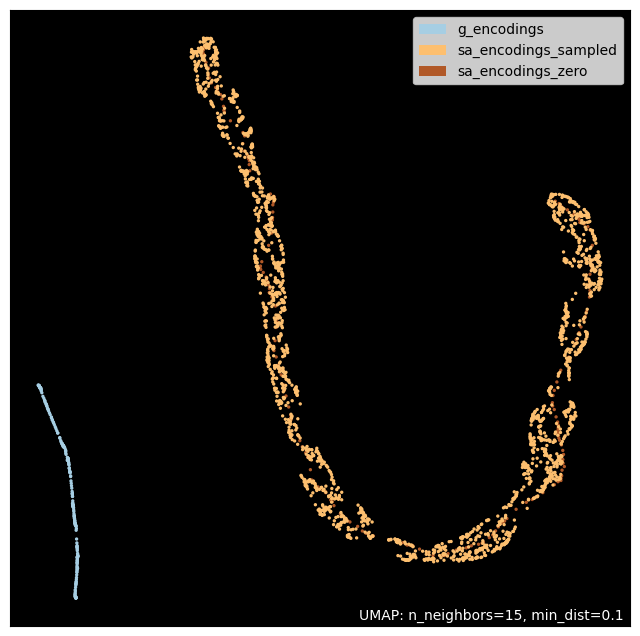

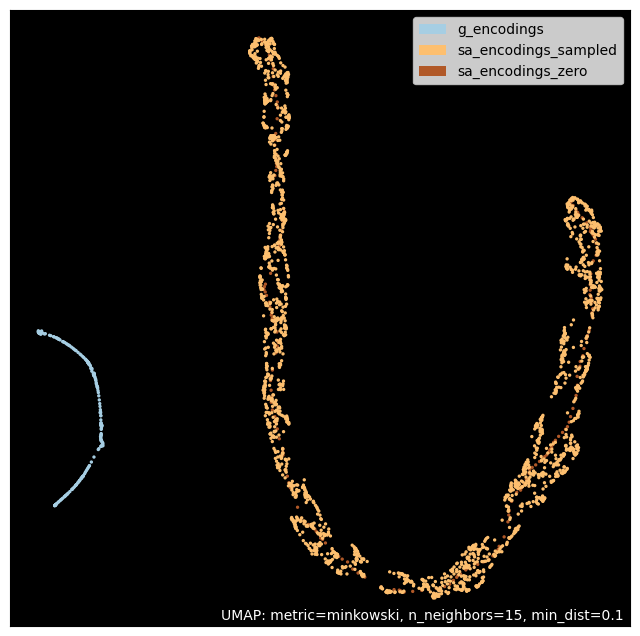

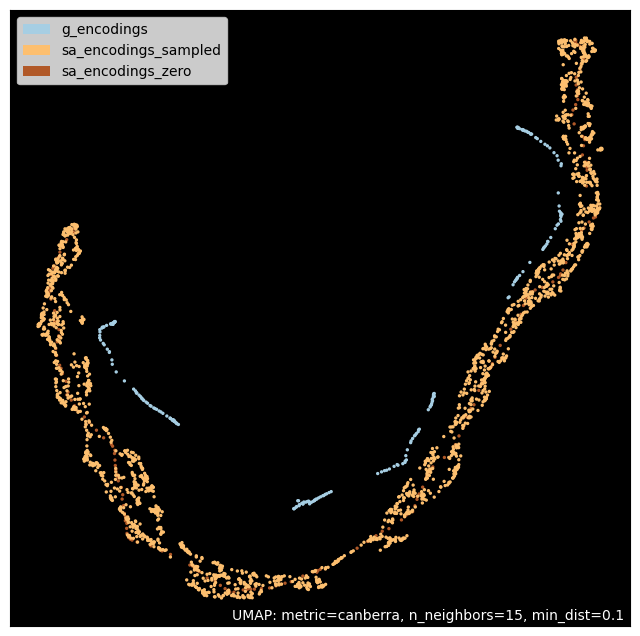

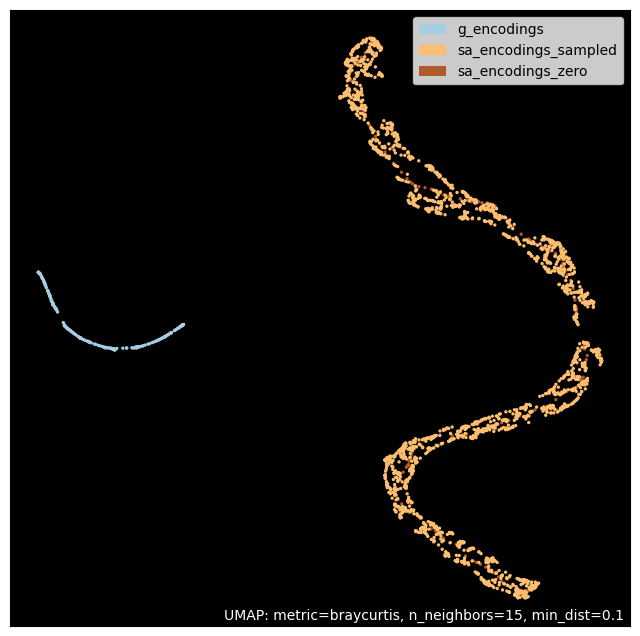

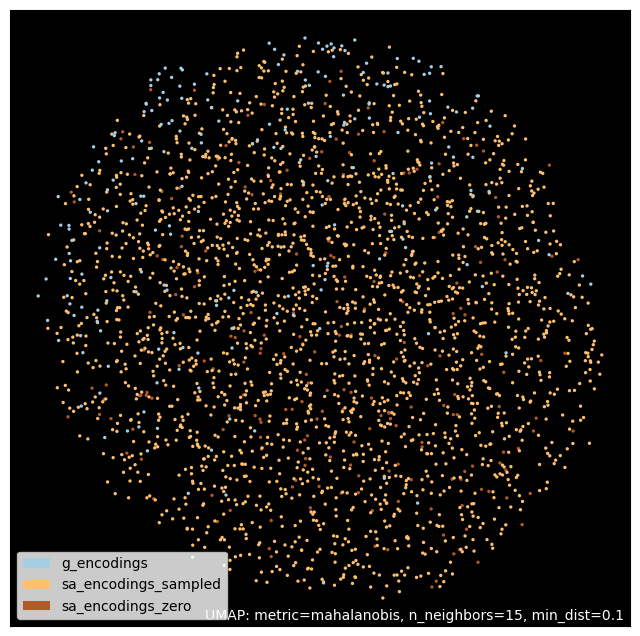

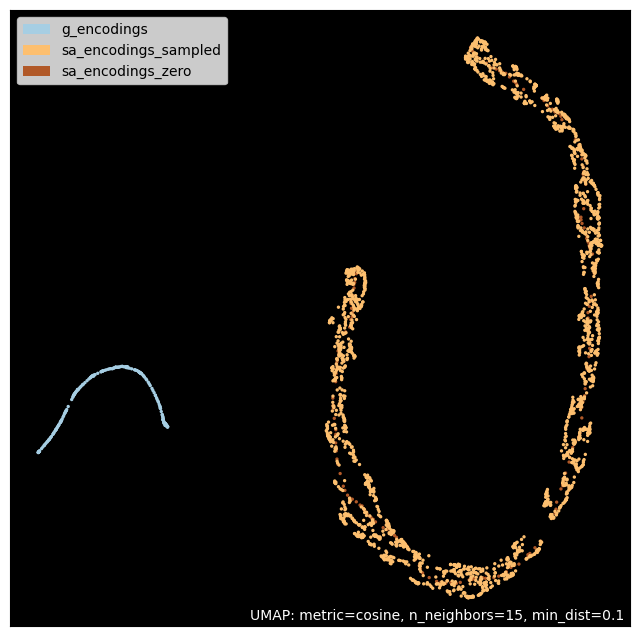

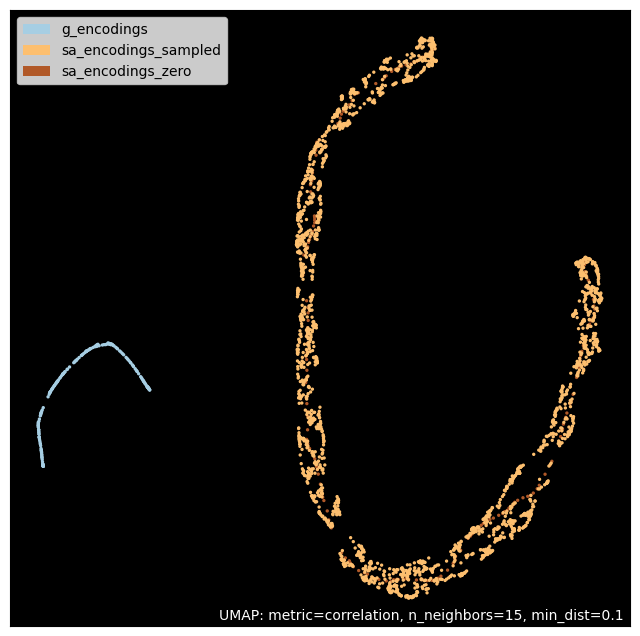

In [5]:
for conf in config_list:
    try:
        mapper = umap.UMAP(
            n_neighbors = conf.n_neighbors,
            min_dist = conf.min_dist,
            metric = conf.metric
        ).fit(encodings_data.data)
        umap.plot.points(mapper, labels=encodings_data.labels, color_key_cmap='Paired', background='black')
    except:
        # had to catch some ZeroDivision Errors in a previous configuration setup
        pass